In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy import ndimage
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv('C:/Users/Admin/datasets/exoTrain.csv')
test = pd.read_csv('C:/Users/Admin/datasets/exoTest.csv')

In [5]:
train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [6]:
test

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


# Stars with Exoplanets

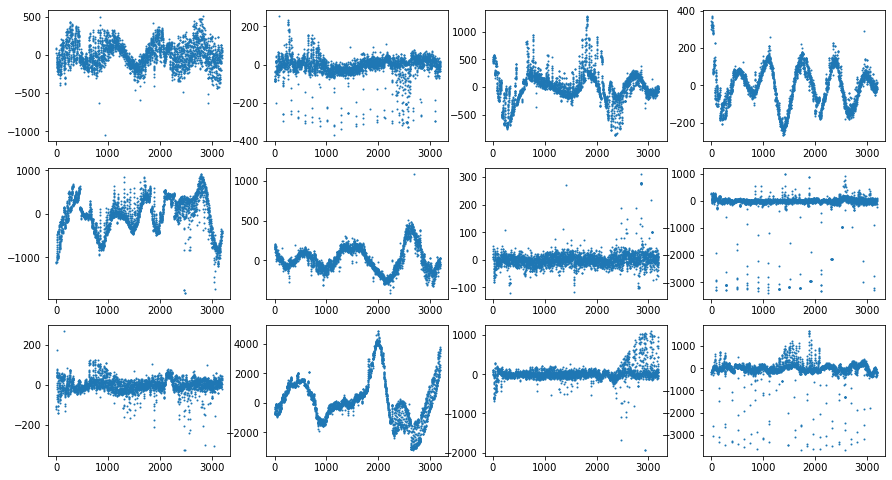

In [7]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL'] == 2].iloc[i,1:],s=1)

# Stars without Exoplanets

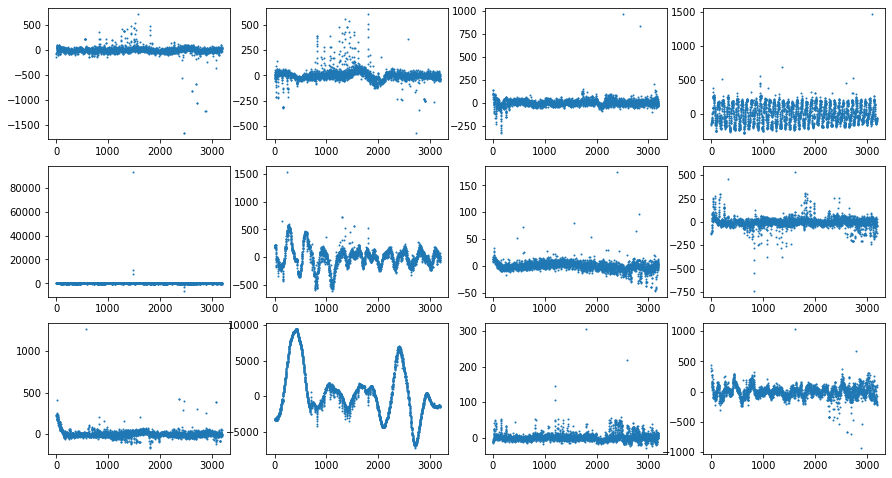

In [8]:
fig = plt.figure(figsize=(15,40))
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train[train['LABEL']==1].iloc[i,1:],s=1)

In [5]:
maxval = train.iloc[:,1:].max(axis=1)
minval = train.iloc[:,1:].min(axis=1)

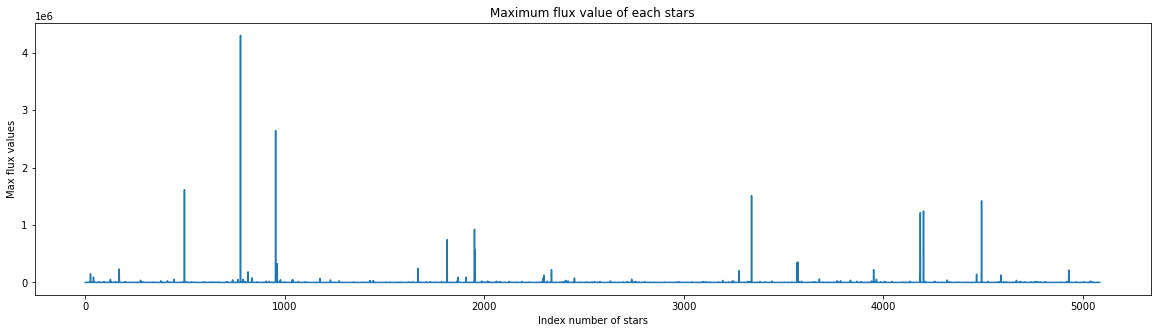

In [6]:
plt.figure(figsize=(20,5))
plt.title('Maximum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Max flux values')
plt.plot(np.arange(len(maxval)),maxval)

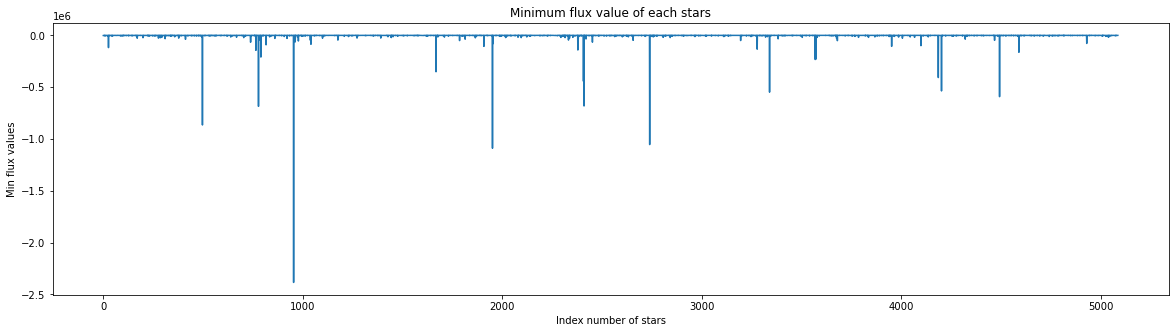

In [7]:
plt.figure(figsize=(20,5))
plt.title('Minimum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Min flux values')
plt.plot(np.arange(len(minval)),minval)

## Observations so far
- Dataset is highly imbalanced i.e. 100:1
- Even with a few plotted samples, we can see that, there are a lot of outliers.
- May contains noise as U-shaped curve is not easily visible
- So we may require signal filters and scalers

In [3]:
def reset(train,test):
    train_X = train.drop('LABEL', axis=1)
    train_y = train['LABEL'].values
    test_X = test.drop('LABEL', axis=1)
    test_y = test['LABEL'].values
    return train_X,train_y,test_X,test_y

train_X,train_y,test_X,test_y = reset(train,test)

In [4]:
def robust(df1,df2):
    scaler = RobustScaler()
    train_X = scaler.fit_transform(df1)
    test_X = scaler.transform(df2)
    return train_X,test_X

In [5]:
def std_scaler(df1,df2):
    std_scaler = StandardScaler()
    train_X = std_scaler.fit_transform(df1)
    test_X = std_scaler.fit_transform(df2)
    return train_X,test_X

In [6]:
def norm(df1,df2):
    train_X = normalize(df1)
    test_X = normalize(df2)
    return train_X,test_X

In [7]:
def fourier(df1,df2):
    train_X = np.abs(np.fft.fft(df1, axis=1))
    test_X = np.abs(np.fft.fft(df2, axis=1))
    return train_X,test_X

In [8]:
def savgol(df1,df2):
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

In [9]:
def smote(a,b):
    model = SMOTE()
    X,y = model.fit_sample(a, b)
    return X,y

In [10]:
def logistic(train_X,train_y,test_X,test_y):
    lgr = LogisticRegression(max_iter=1000)
    lgr.fit(train_X,train_y)
    prediction_lgr=lgr.predict(test_X)
    print("-------------------------------------------")
    print("Logistic Regression")
    print("")
    print(classification_report(test_y,prediction_lgr))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(lgr,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(lgr,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(lgr, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, prediction_lgr,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1
#logistic(train_X,train_y,test_X,test_y)

In [11]:
def decisionTree(train_X,train_y,test_X,test_y):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(train_X, train_y)
    y_pred_clf = clf.predict(test_X)
    print("-------------------------------------------")
    print("DecisionTree Classifier")
    print("")
    print(classification_report(test_y,y_pred_clf))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(clf,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(clf,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(clf, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, y_pred_clf,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1

#decisionTree(train_X,train_y,test_X,test_y)

In [12]:
def linearSVC(train_X,train_y,test_X,test_y):
    svm=LinearSVC()
    svm.fit(train_X,train_y)
    prediction_svm=svm.predict(test_X)
    print("-------------------------------------------")
    print("Linear SVClassifier")
    print("")
    print(classification_report(test_y,prediction_svm))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(svm,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(svm,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(svm, test_X, test_y,ax=ax)
    f1=metrics.f1_score(test_y, prediction_svm,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1
#linearSVC(train_X,train_y,test_X,test_y)

In [13]:
def naiveBayes(train_X,train_y,test_X,test_y):
    gnb = GaussianNB()
    gnb.fit(train_X, train_y)
    y_pred=gnb.predict(test_X)
    print("-------------------------------------------")
    print("Gaussian NaiveBayes Classifier")
    print("")
    print(classification_report(test_y,y_pred))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(gnb,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(gnb,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(gnb, test_X, test_y,ax=ax)
    f1 = metrics.f1_score(test_y, y_pred,pos_label=2)
    print("F1 score of minority class:",f1)
    plt.show()
    return f1
#naiveBayes(train_X,train_y,test_X,test_y)

In [14]:
def knn(train_X,train_y,test_X,test_y):
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(train_X, train_y)
    y_pred_neigh = neigh.predict(test_X)
    print("-------------------------------------------")
    print("k-Nearest Neighbour Classifier")
    print("")
    print(classification_report(test_y,y_pred_neigh))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(neigh,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(neigh,test_X, test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--')
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(neigh, test_X, test_y,ax=ax)
    plt.show()
    f1 = metrics.f1_score(test_y, y_pred_neigh,pos_label=2)
    print("F1 score of minority class:",f1)
    return f1
#knn(train_X,train_y,test_X,test_y) 

In [15]:
def randomForest(train_X,train_y,test_X,test_y):
    rnd = RandomForestClassifier()
    rnd.fit(train_X, train_y)
    y_pred_rnd = rnd.predict(test_X)
    print("-------------------------------------------")
    print("Random Forest Classifier")
    print("")
    print(classification_report(test_y,y_pred_rnd))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(rnd,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(rnd,test_X,test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--') 
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(rnd, test_X, test_y,ax=ax)
    plt.show()
    f1 = metrics.f1_score(test_y, y_pred_rnd,pos_label=2)
    print("F1 score of minority class:",f1)
    return f1
#randomForest(train_X,train_y,test_X,test_y)

In [16]:
def XGB(train_X,train_y,test_X,test_y):
    
    xgbc = XGBClassifier(base_score=0.5, booster='gbtree', verbosity=1) 
    xgbc.fit(train_X, train_y)
    y_pred_xgbc = xgbc.predict(test_X)
    print("-------------------------------------------")
    print("XGBClassifier")
    print("")
    print(classification_report(test_y,y_pred_xgbc))
    fig = plt.figure(figsize=(22,7))
    ax = fig.add_subplot(1,3,1)
    plot_confusion_matrix(xgbc,test_X,test_y,ax=ax)
    ax = fig.add_subplot(1,3,2)
    metrics.plot_roc_curve(xgbc,test_X,test_y,ax=ax)
    plt.plot([0, 1], [0, 1], 'k--') 
    ax = fig.add_subplot(1,3,3)
    metrics.plot_precision_recall_curve(xgbc, test_X, test_y,ax=ax)
    plt.show()
    f1 = metrics.f1_score(test_y, y_pred_xgbc,pos_label=2)
    print("F1 score of minority class:",f1)
    return f1

## Model Comparison with Raw Data

In [17]:
train_X,train_y,test_X,test_y = reset(train,test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      0.64      0.78       565
           2       0.02      0.80      0.04         5

    accuracy                           0.65       570
   macro avg       0.51      0.72      0.41       570
weighted avg       0.99      0.65      0.78       570

F1 score of minority class: 0.03809523809523809


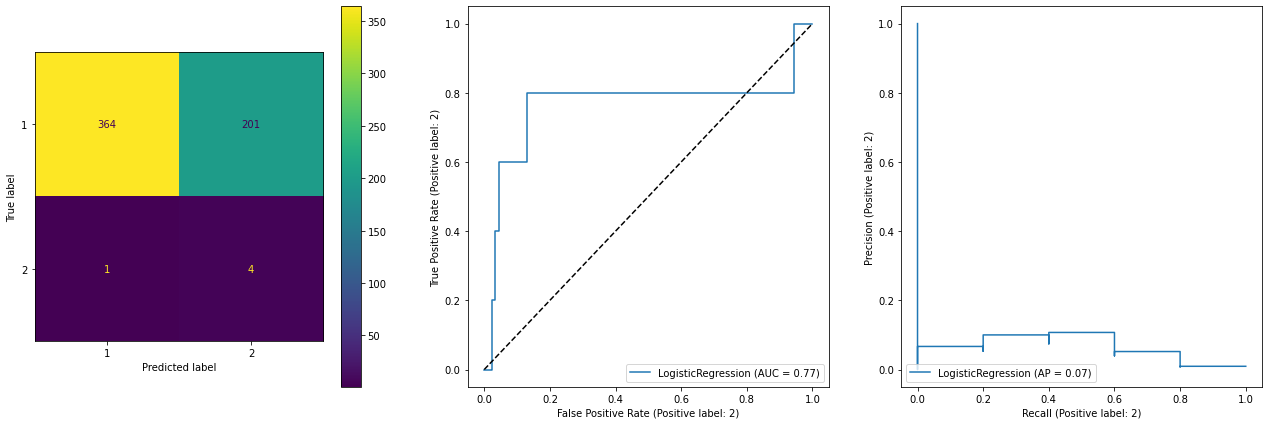

In [18]:
f1_original =  []
f1_original.append(logistic(train_X,train_y,test_X,test_y))

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       565
           2       0.17      0.20      0.18         5

    accuracy                           0.98       570
   macro avg       0.58      0.60      0.59       570
weighted avg       0.99      0.98      0.98       570

F1 score of minority class: 0.1818181818181818


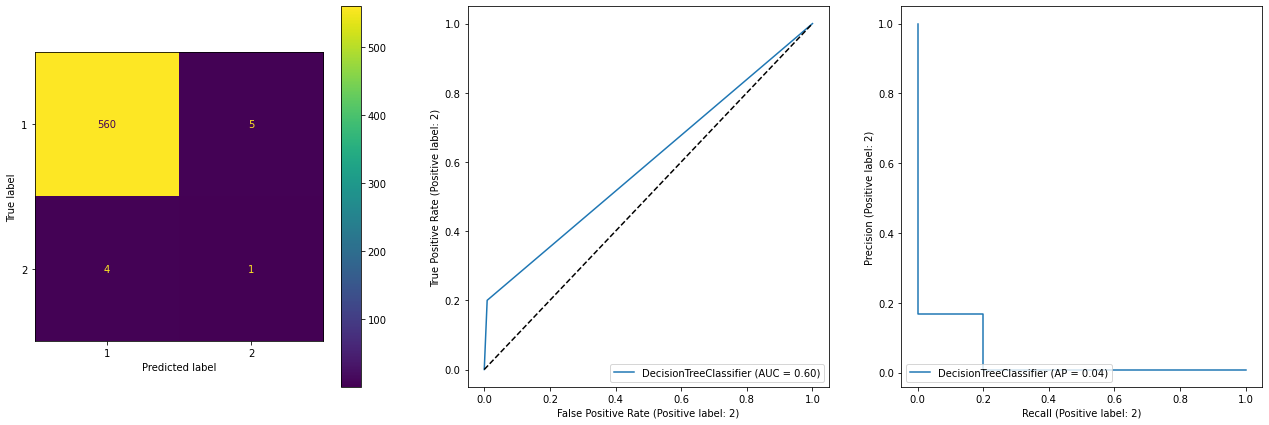

In [19]:
f1_original.append(decisionTree(train_X,train_y,test_X,test_y))

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

F1 score of minority class: 0.027906976744186046


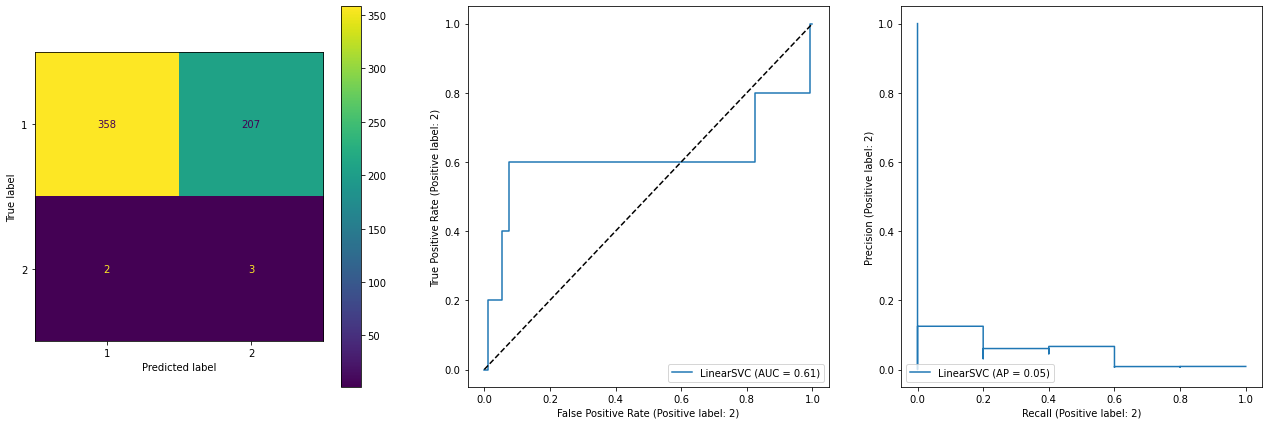

In [20]:
f1_original.append(linearSVC(train_X,train_y,test_X,test_y))

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       1.00      0.02      0.03       565
           2       0.01      1.00      0.02         5

    accuracy                           0.02       570
   macro avg       0.50      0.51      0.02       570
weighted avg       0.99      0.02      0.03       570

F1 score of minority class: 0.017667844522968195


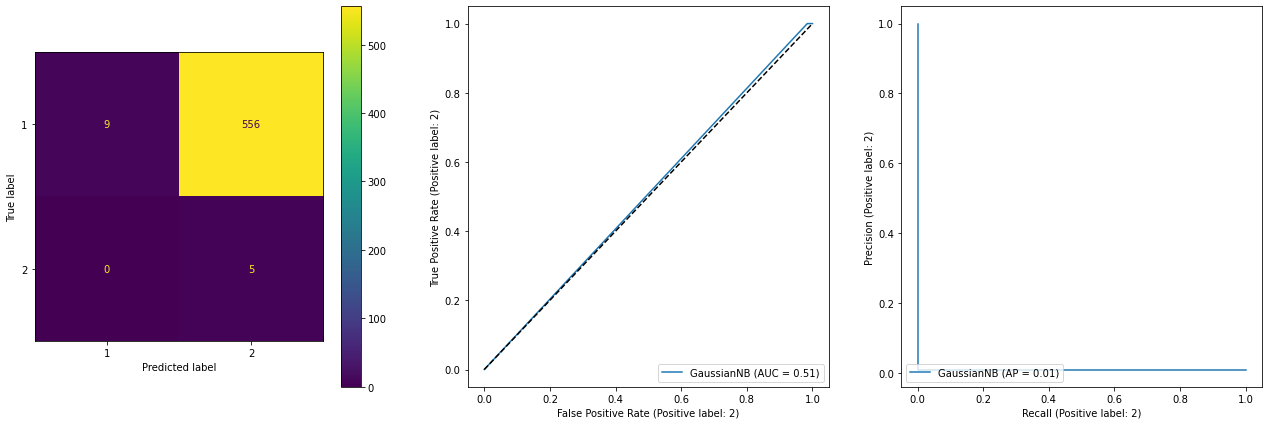

In [21]:
f1_original.append(naiveBayes(train_X,train_y,test_X,test_y))

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


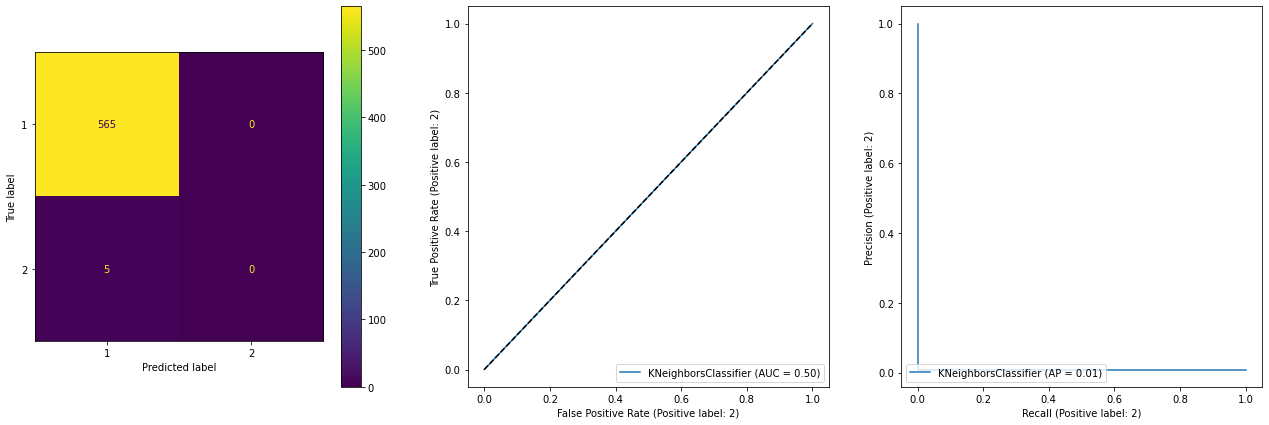

F1 score of minority class: 0.0


In [22]:
f1_original.append(knn(train_X,train_y,test_X,test_y))

-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


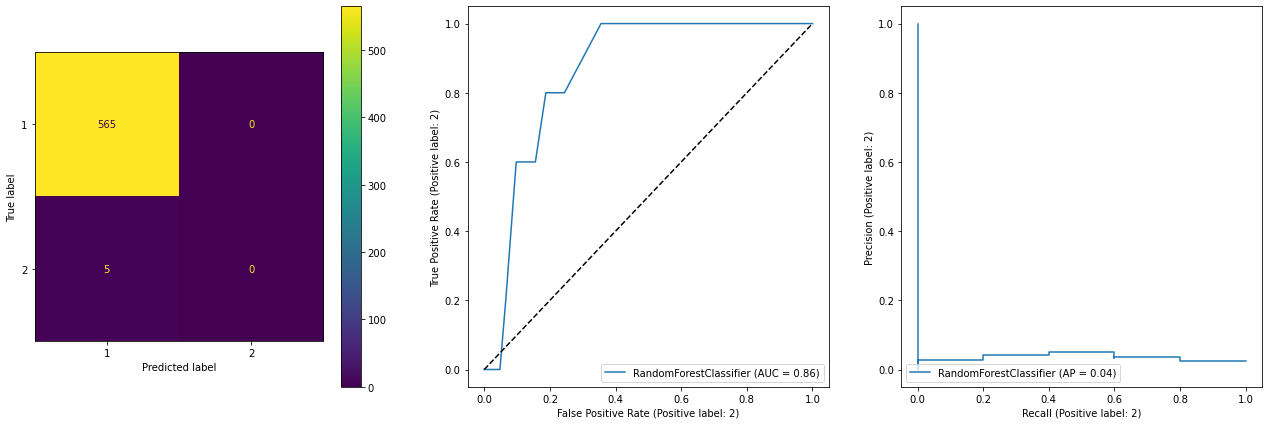

F1 score of minority class: 0.0


In [23]:
f1_original.append(randomForest(train_X,train_y,test_X,test_y))

C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:10:57] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------
XGBClassifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


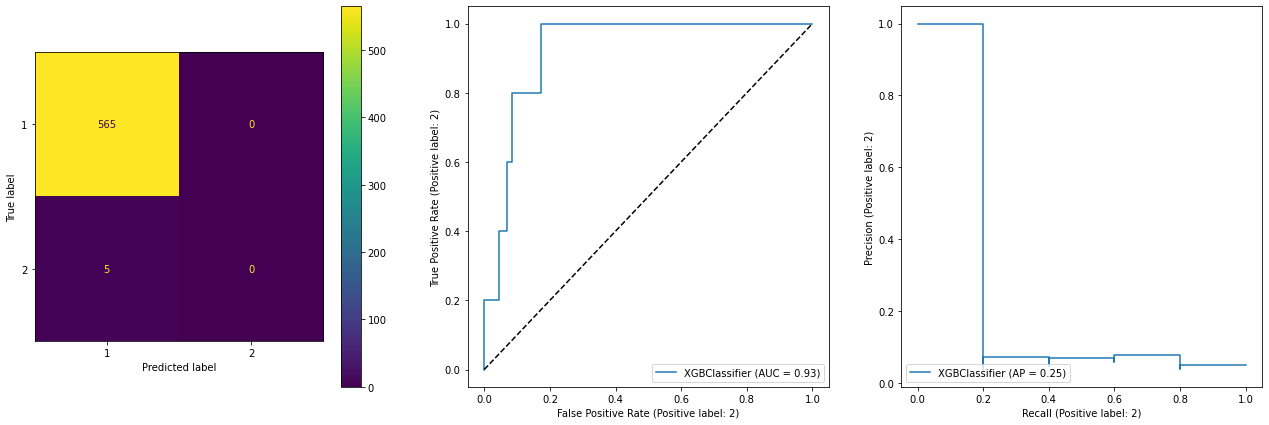

F1 score of minority class: 0.0


In [24]:
f1_original.append(XGB(train_X,train_y,test_X,test_y))

In [25]:
f1_original

[0.03809523809523809,
 0.1818181818181818,
 0.027906976744186046,
 0.017667844522968195,
 0.0,
 0.0,
 0.0]

# Feature Engineering

In [27]:
train_X,train_y,test_X,test_y = reset(train,test)
a,b = fourier(train_X,test_X)
c,d = savgol(a,b)
e,f = norm(c,d)
g,h = robust(e,f)

In [28]:
planets = [0,1,2,3,4,5,6,44,56,67,78,91,92,97]

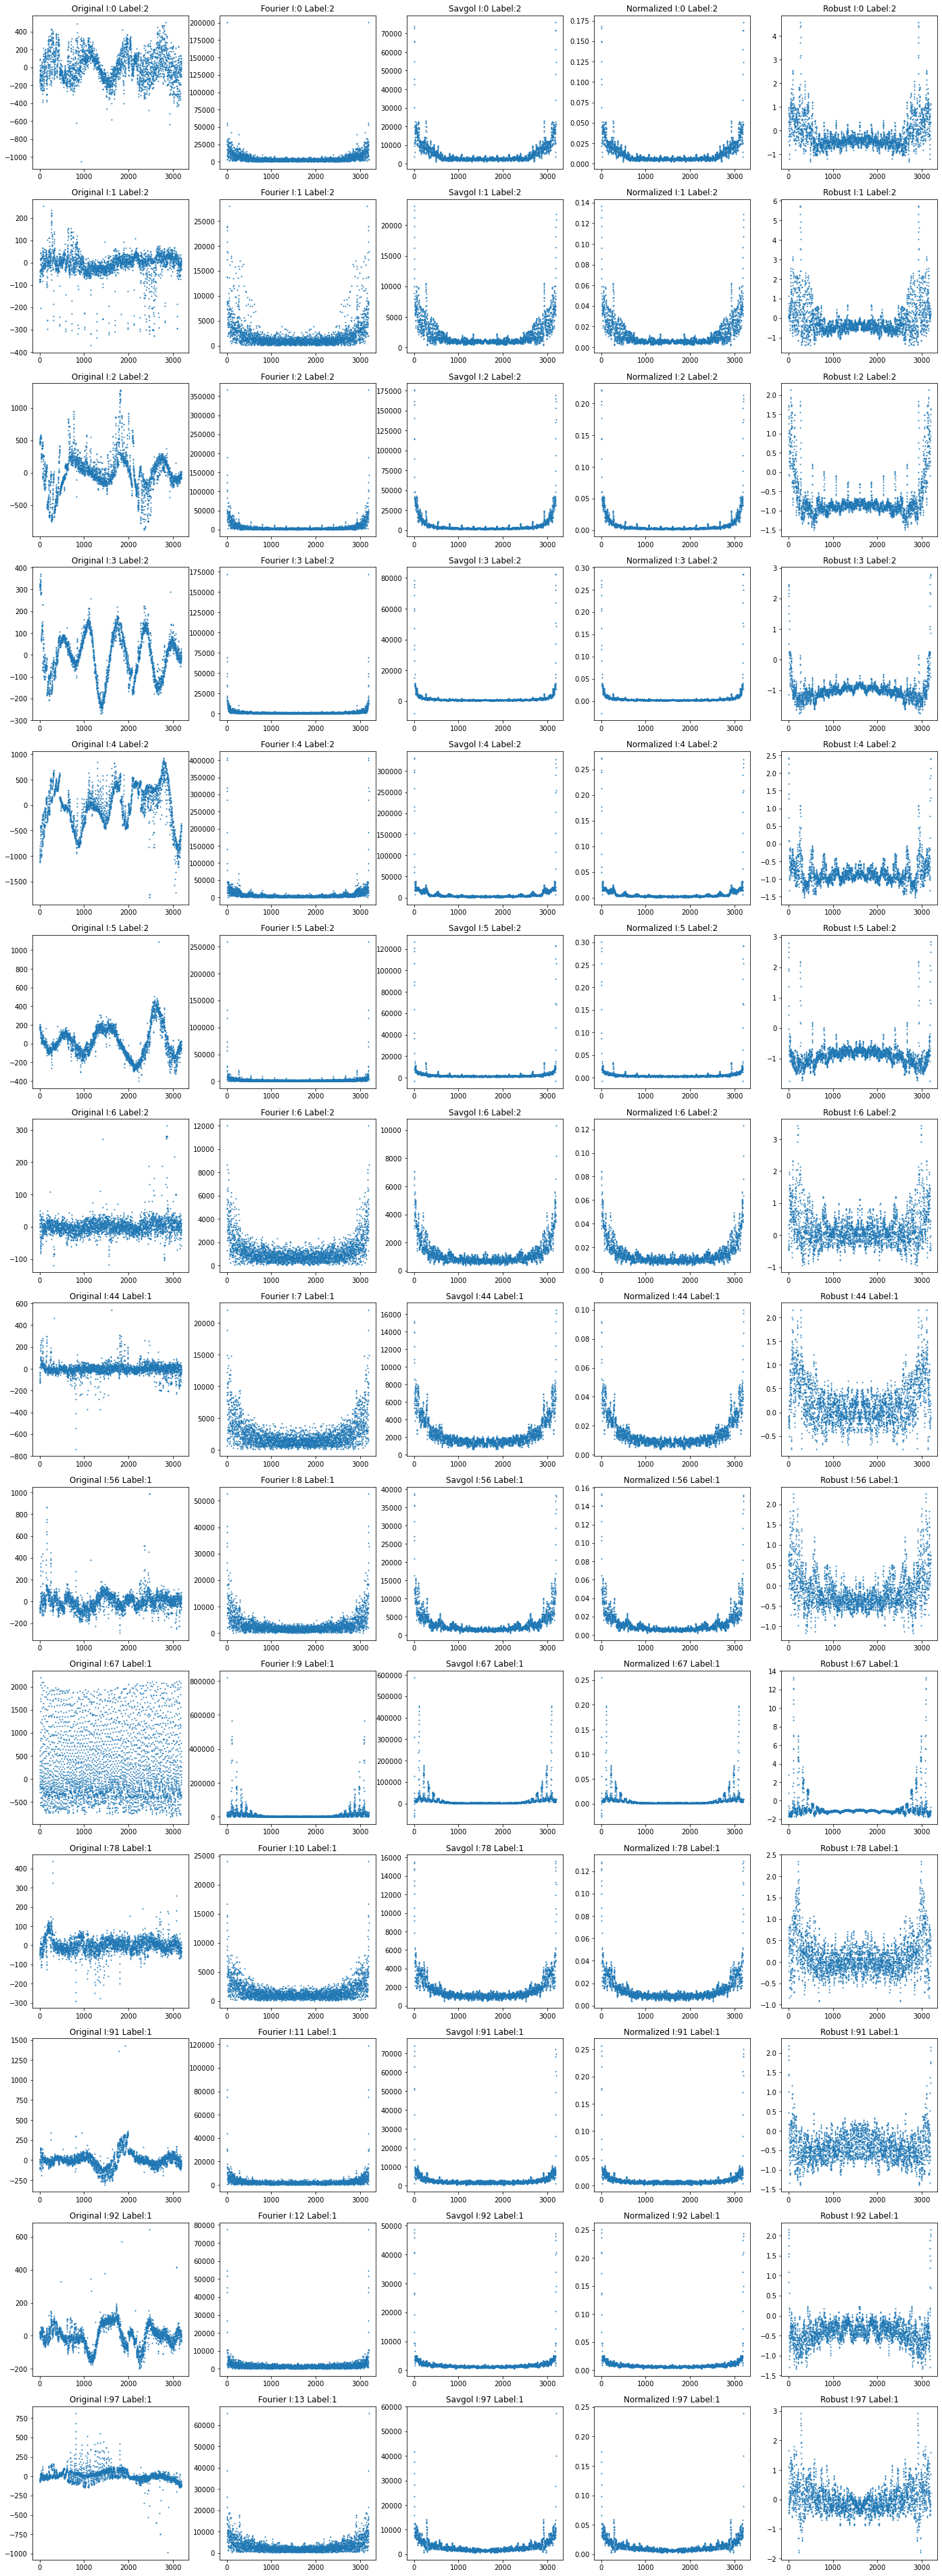

In [29]:
fig = plt.figure(figsize=(24,500))
x = np.array(range(3197))
for i in range(0,len(planets)):
    ax = fig.add_subplot(100,5,5*i+1)
    ax.set_title('Original '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,train_X.iloc[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+2)
    ax.set_title('Fourier '+"I:"+str(i)+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,a[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+3)
    ax.set_title('Savgol '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,c[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+4)
    ax.set_title('Normalized '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,e[planets[i],:],s=1)
    
    ax = fig.add_subplot(100,5,5*i+5)
    ax.set_title('Robust '+"I:"+str(planets[i])+" Label:"+str(train_y[planets[i]]))
    ax.scatter(x,g[planets[i],:],s=1)

# Model Comparison with feature engineering

-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       0.60      0.60      0.60         5

    accuracy                           0.99       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.99      0.99      0.99       570

F1 score of minority class: 0.6


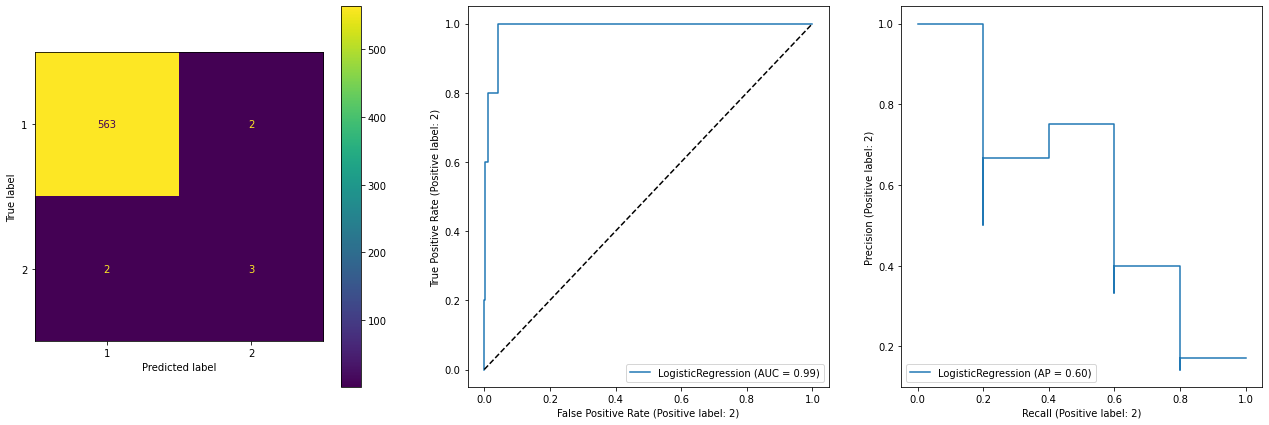

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       0.83      1.00      0.91         5

    accuracy                           1.00       570
   macro avg       0.92      1.00      0.95       570
weighted avg       1.00      1.00      1.00       570

F1 score of minority class: 0.9090909090909091


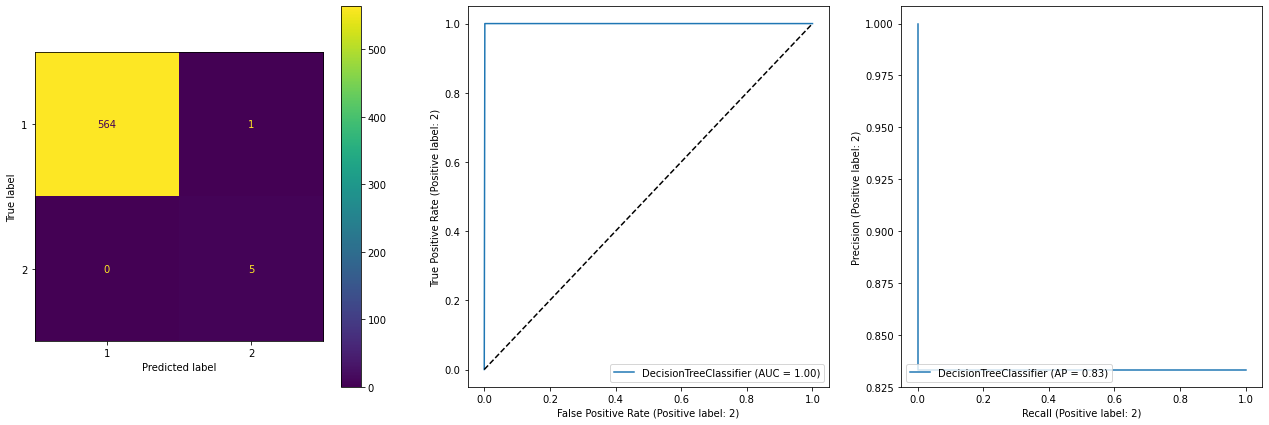

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       565
           2       0.50      0.80      0.62         5

    accuracy                           0.99       570
   macro avg       0.75      0.90      0.81       570
weighted avg       0.99      0.99      0.99       570

F1 score of minority class: 0.6153846153846154


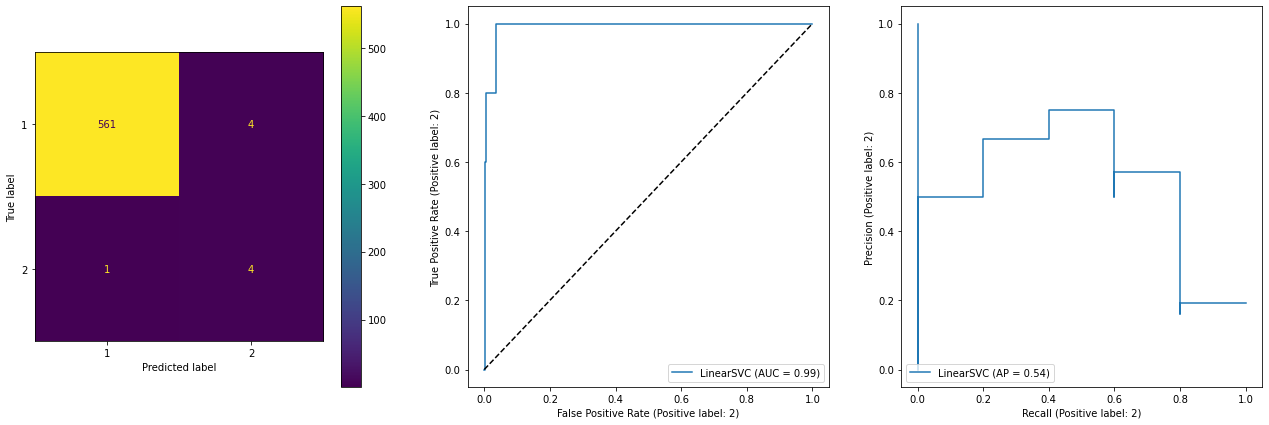

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       1.00      0.77      0.87       565
           2       0.04      1.00      0.07         5

    accuracy                           0.77       570
   macro avg       0.52      0.88      0.47       570
weighted avg       0.99      0.77      0.86       570

F1 score of minority class: 0.0704225352112676


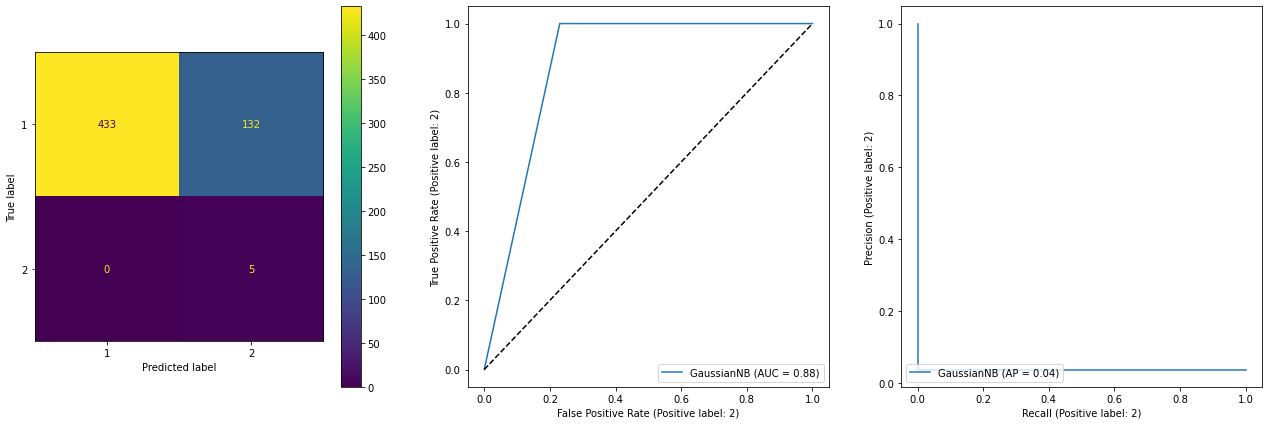

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       1.00      0.40      0.57         5

    accuracy                           0.99       570
   macro avg       1.00      0.70      0.78       570
weighted avg       0.99      0.99      0.99       570



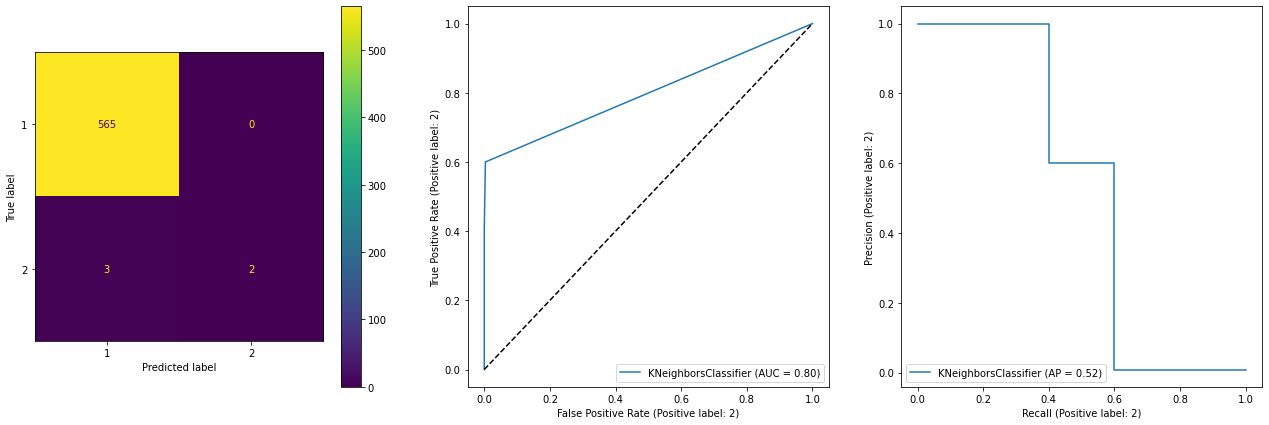

F1 score of minority class: 0.5714285714285715
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       1.00      0.40      0.57         5

    accuracy                           0.99       570
   macro avg       1.00      0.70      0.78       570
weighted avg       0.99      0.99      0.99       570



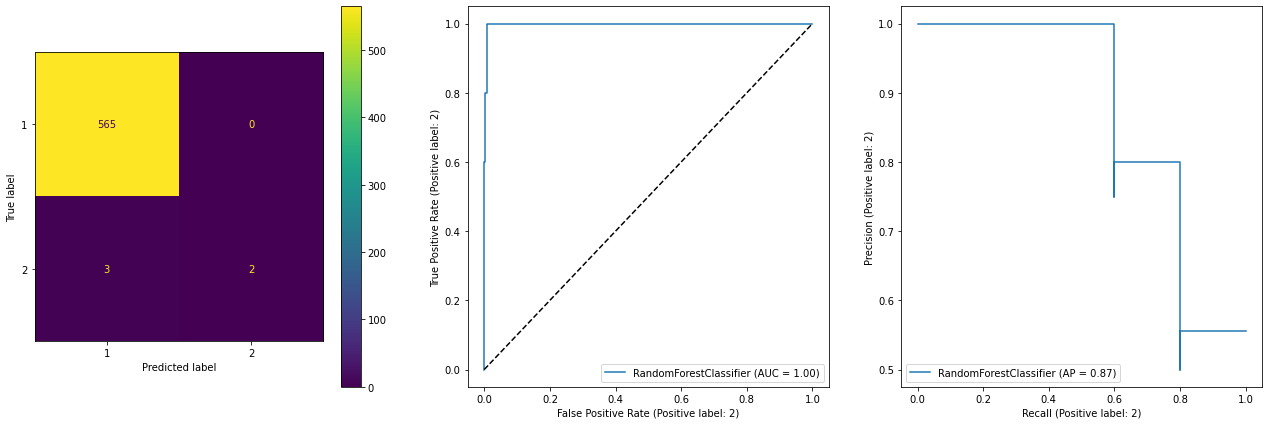

F1 score of minority class: 0.5714285714285715


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:15:13] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------
XGBClassifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       1.00      0.60      0.75         5

    accuracy                           1.00       570
   macro avg       1.00      0.80      0.87       570
weighted avg       1.00      1.00      1.00       570



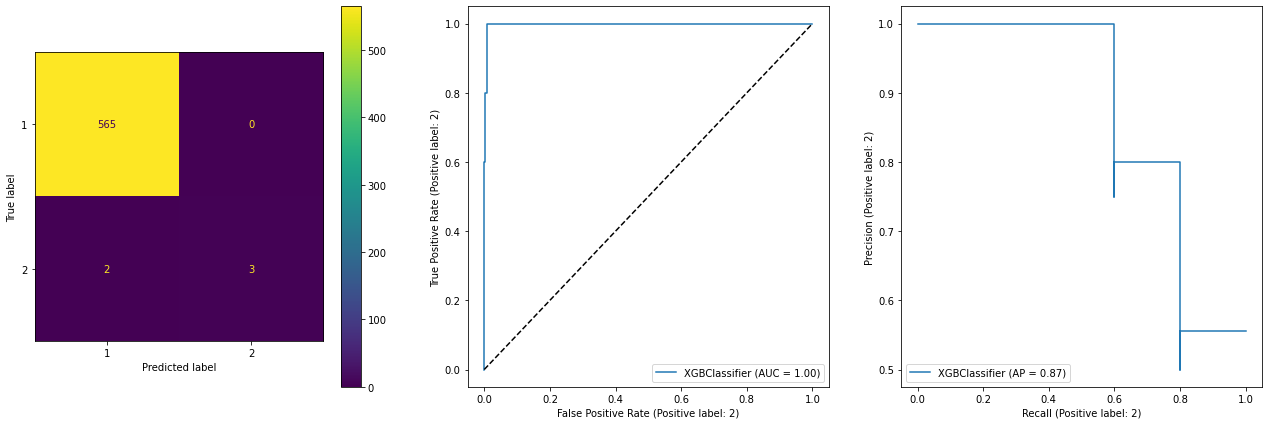

F1 score of minority class: 0.7499999999999999


[0.6,
 0.9090909090909091,
 0.6153846153846154,
 0.0704225352112676,
 0.5714285714285715,
 0.5714285714285715,
 0.7499999999999999]

In [30]:
train_X,train_y,test_X,test_y = reset(train,test)
train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

f1_processed =  []
f1_processed.append(logistic(train_X,train_y,test_X,test_y))
f1_processed.append(decisionTree(train_X,train_y,test_X,test_y))
f1_processed.append(linearSVC(train_X,train_y,test_X,test_y))
f1_processed.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_processed.append(knn(train_X,train_y,test_X,test_y))
f1_processed.append(randomForest(train_X,train_y,test_X,test_y))
f1_processed.append(XGB(train_X,train_y,test_X,test_y))
f1_processed

# Model Comparison with SMOTE

-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       1.00      0.99      1.00      2100
           2       0.99      1.00      1.00      1500

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600

F1 score of minority class: 0.9953488372093025


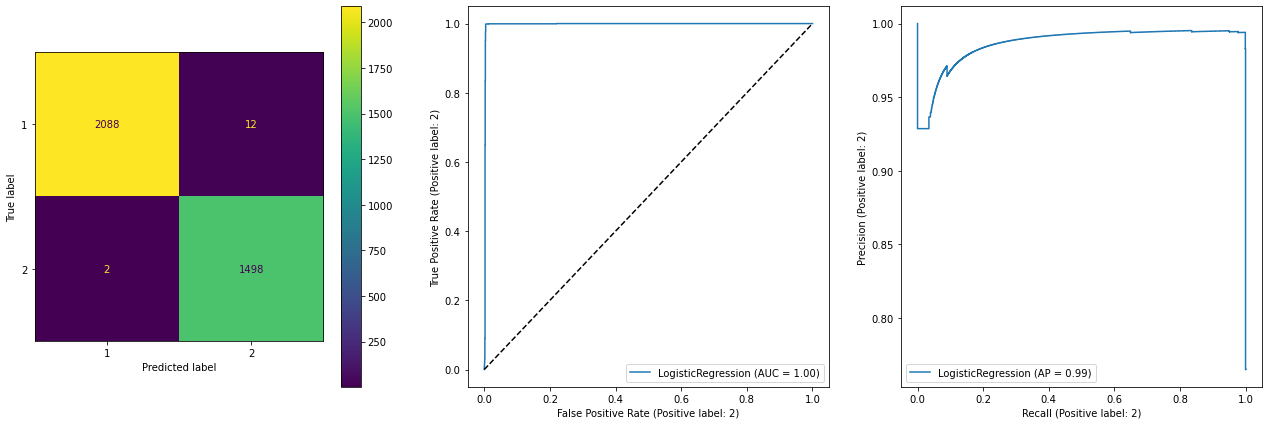

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       1.00      0.99      0.99      2100
           2       0.99      1.00      0.99      1500

    accuracy                           0.99      3600
   macro avg       0.99      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600

F1 score of minority class: 0.9916971105944868


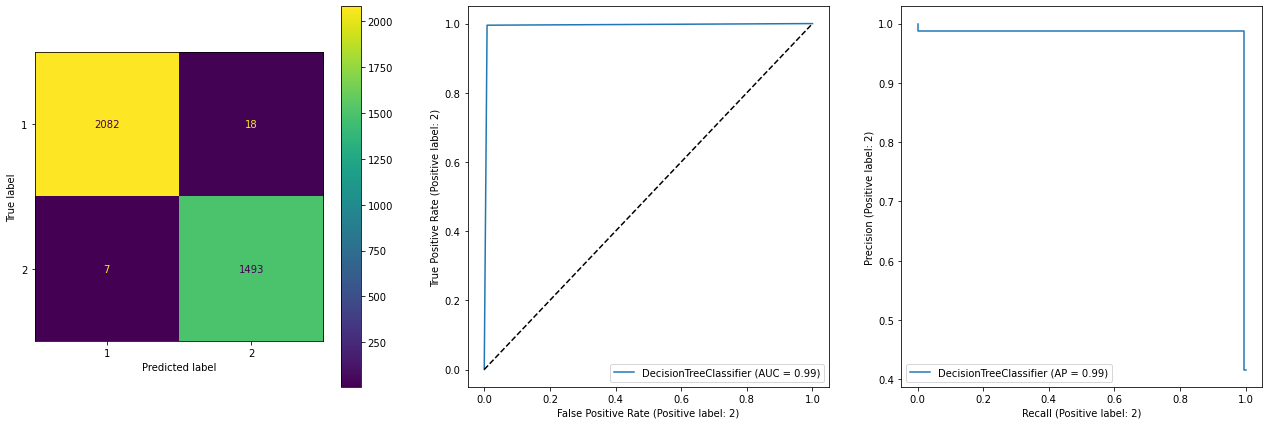

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       1.00      0.98      0.99      2100
           2       0.97      1.00      0.98      1500

    accuracy                           0.99      3600
   macro avg       0.98      0.99      0.99      3600
weighted avg       0.99      0.99      0.99      3600

F1 score of minority class: 0.9829508196721312


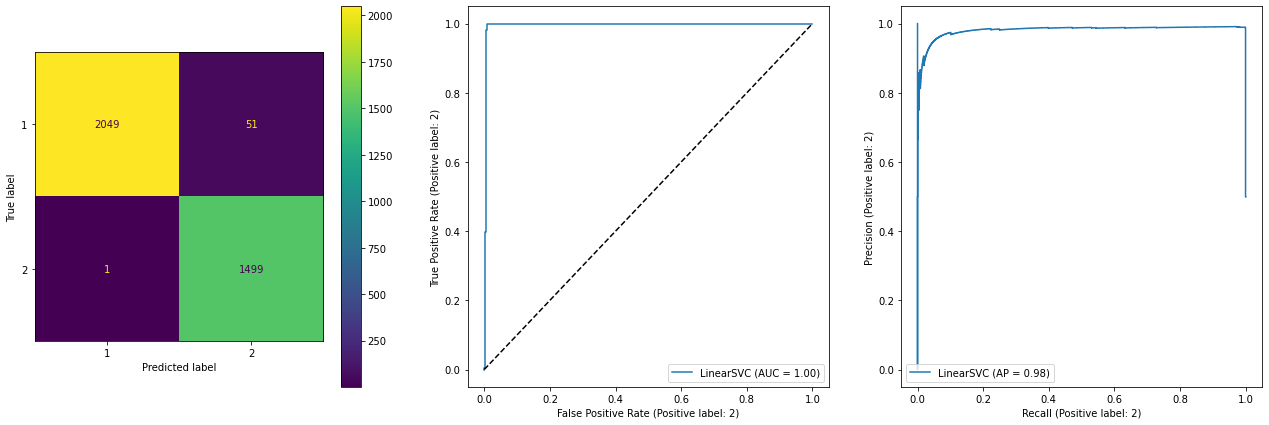

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       0.87      0.70      0.78      2100
           2       0.67      0.86      0.75      1500

    accuracy                           0.77      3600
   macro avg       0.77      0.78      0.77      3600
weighted avg       0.79      0.77      0.77      3600

F1 score of minority class: 0.7533763945977686


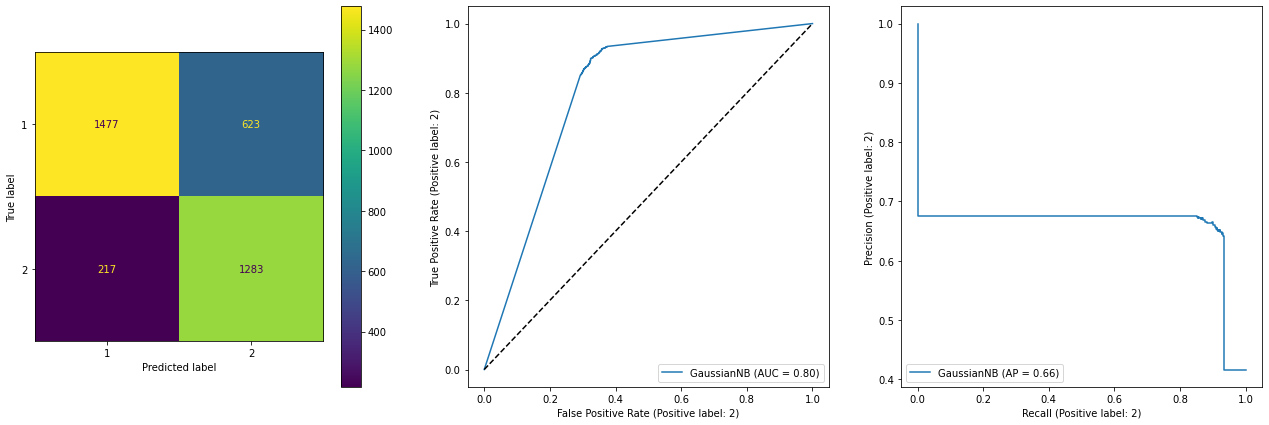

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       1.00      0.88      0.93      2100
           2       0.85      1.00      0.92      1500

    accuracy                           0.93      3600
   macro avg       0.93      0.94      0.93      3600
weighted avg       0.94      0.93      0.93      3600



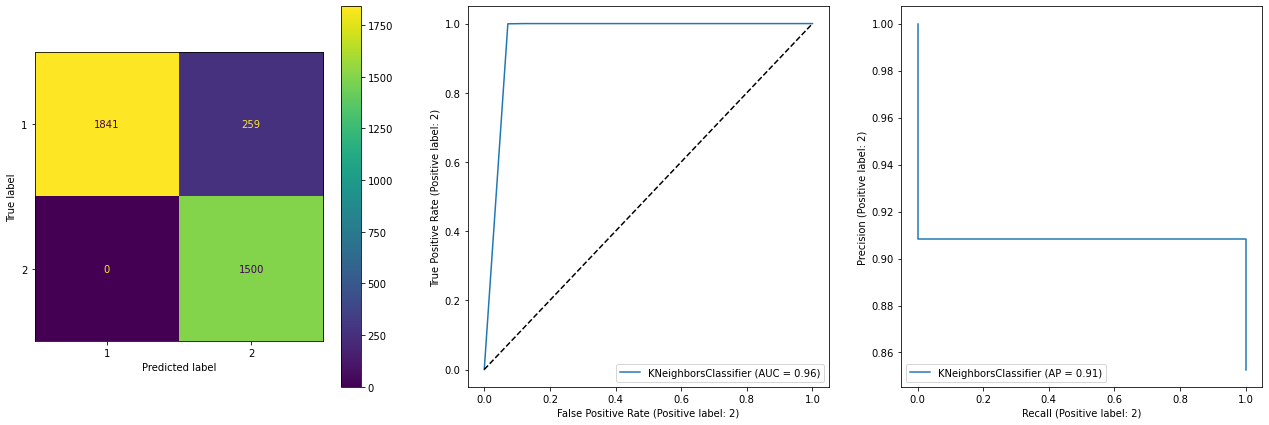

F1 score of minority class: 0.9205277692543725
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2100
           2       1.00      1.00      1.00      1500

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



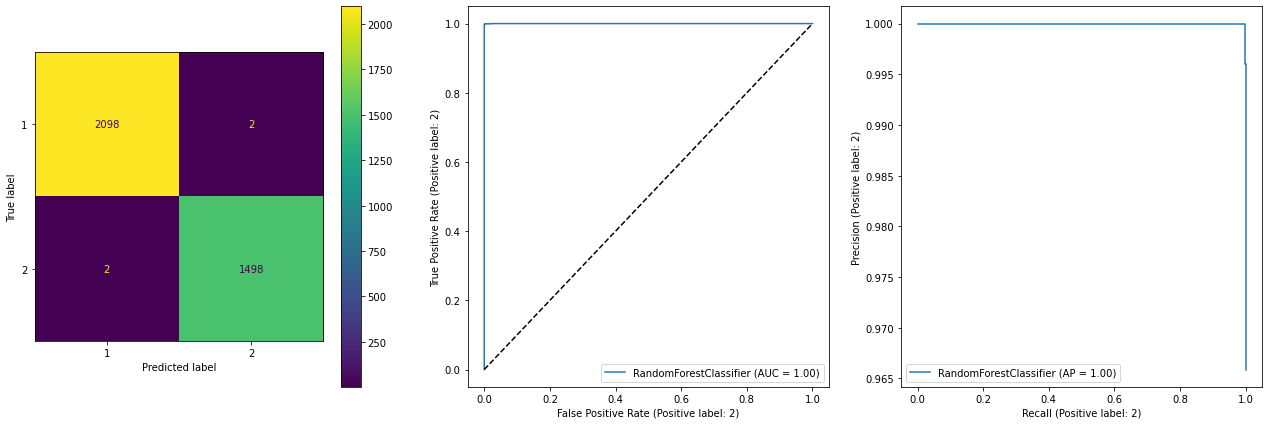

F1 score of minority class: 0.9986666666666667


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:31:00] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
-------------------------------------------
XGBClassifier

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2100
           2       1.00      1.00      1.00      1500

    accuracy                           1.00      3600
   macro avg       1.00      1.00      1.00      3600
weighted avg       1.00      1.00      1.00      3600



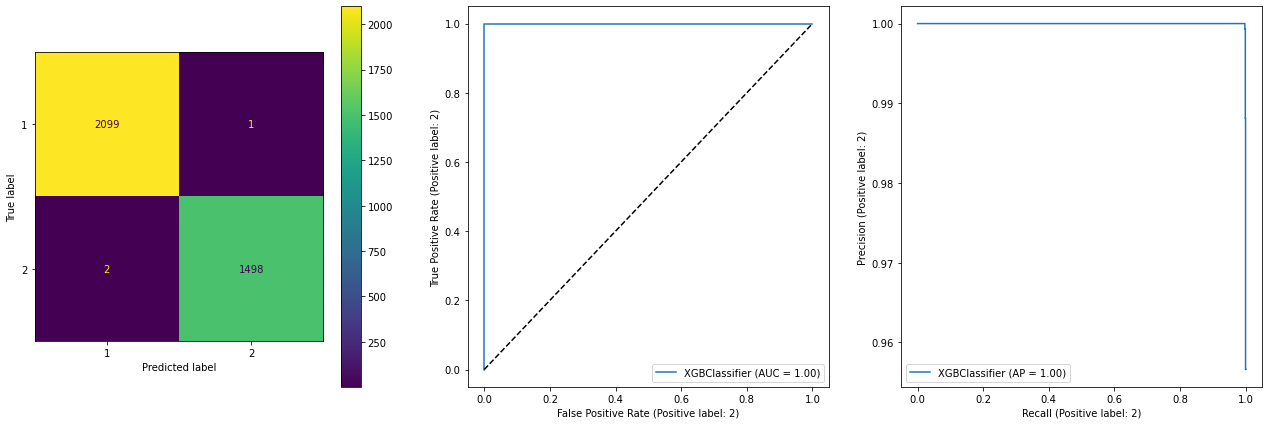

F1 score of minority class: 0.9989996665555185


[0.9953488372093025,
 0.9916971105944868,
 0.9829508196721312,
 0.7533763945977686,
 0.9205277692543725,
 0.9986666666666667,
 0.9989996665555185]

In [47]:
train_X,train_y,test_X,test_y = reset(train,test)

train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

train_X,train_y = smote(train_X,train_y)
train_X, X, train_y, y = train_test_split(train_X, train_y, test_size=0.3)
test_X = np.concatenate((test_X, X), axis=0)
test_y = np.concatenate((test_y, y), axis=0)

f1_smote =  []
f1_smote.append(logistic(train_X,train_y,test_X,test_y))
f1_smote.append(decisionTree(train_X,train_y,test_X,test_y))
f1_smote.append(linearSVC(train_X,train_y,test_X,test_y))
f1_smote.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_smote.append(knn(train_X,train_y,test_X,test_y))
f1_smote.append(randomForest(train_X,train_y,test_X,test_y))
f1_smote.append(XGB(train_X,train_y,test_X,test_y))
f1_smote

# PCA

In [42]:
train_X,train_y,test_X,test_y = reset(train,test)

train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

train_X,train_y = smote(train_X,train_y)
train_X, X, train_y, y = train_test_split(train_X, train_y, test_size=0.3)
test_X = np.concatenate((test_X, X), axis=0)
test_y = np.concatenate((test_y, y), axis=0)

In [43]:
pca = PCA(n_components=0.90)
pca.fit(train_X)
print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
pca_train_X = pca.transform(train_X)
pca.fit(test_X)
print(pca.explained_variance_ratio_)
#print(pca.singular_values_)
pca_test_X = pca.transform(test_X)
train_X = pca_train_X[:,:6]
test_X = pca_test_X[:,:6]

[0.56034209 0.12908923 0.02792635 0.02483815 0.01174689 0.01138931
 0.00965413 0.00781143 0.00749138 0.00688823 0.00642297 0.00551059
 0.00516702 0.00454546 0.00440464 0.00409525 0.00396447 0.00381447
 0.00370019 0.00356899 0.00340916 0.0031777  0.0031492  0.00301595
 0.00286534 0.00275623 0.00270019 0.00246851 0.002398   0.00232565
 0.00224735 0.00211832 0.00205549 0.00199541 0.00192835 0.00187871
 0.0017805  0.00171346 0.00165599 0.00161442 0.00160524 0.00155816
 0.00152542 0.00143646 0.00140497 0.001382   0.00134704 0.0013264 ]
[0.55537868 0.12644725 0.02803117 0.02492471 0.01128941 0.01070346
 0.00864139 0.008149   0.00655312 0.00610566 0.00567995 0.00520602
 0.00502256 0.00474758 0.00449094 0.00412197 0.00399462 0.00377172
 0.00369721 0.00350642 0.00337867 0.00321808 0.00309949 0.0028911
 0.00275925 0.00269919 0.00260598 0.00245898 0.00238972 0.00226757
 0.00223565 0.00220299 0.00214446 0.00199019 0.00196938 0.00195226
 0.00187078 0.00184689 0.00175394 0.0017332  0.00164153 0.0015

-------------------------------------------
Logistic Regression

              precision    recall  f1-score   support

           1       0.99      0.87      0.93      2065
           2       0.85      0.99      0.91      1535

    accuracy                           0.92      3600
   macro avg       0.92      0.93      0.92      3600
weighted avg       0.93      0.92      0.92      3600

F1 score of minority class: 0.9146121467227901


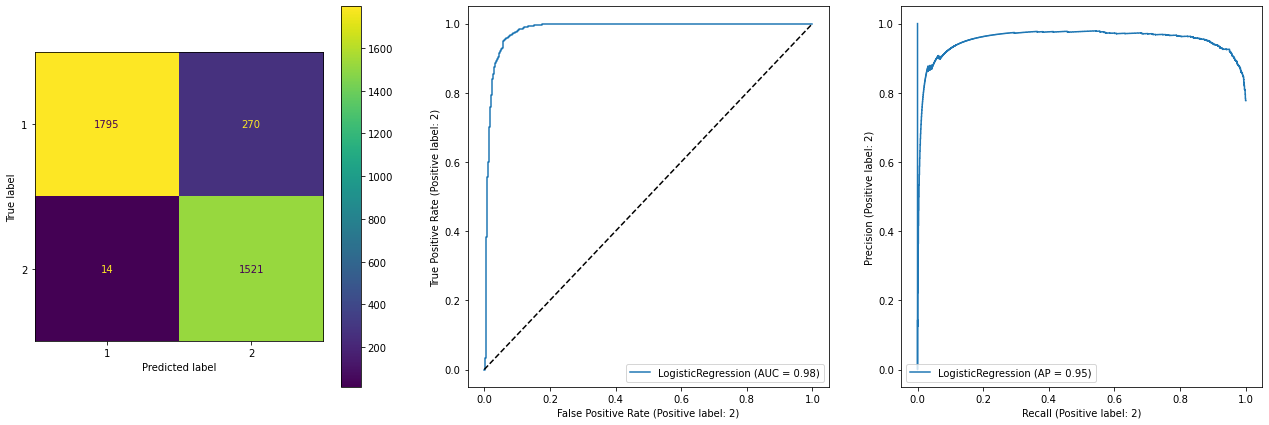

-------------------------------------------
DecisionTree Classifier

              precision    recall  f1-score   support

           1       0.93      0.98      0.95      2065
           2       0.97      0.90      0.93      1535

    accuracy                           0.95      3600
   macro avg       0.95      0.94      0.94      3600
weighted avg       0.95      0.95      0.95      3600

F1 score of minority class: 0.9338731443994601


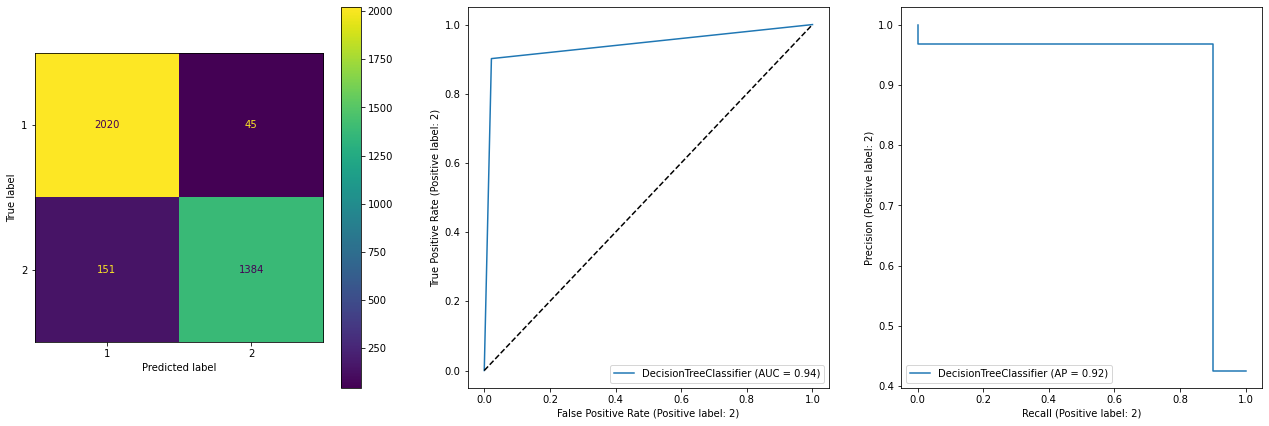

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------------------------
Linear SVClassifier

              precision    recall  f1-score   support

           1       0.99      0.83      0.90      2065
           2       0.81      0.99      0.89      1535

    accuracy                           0.90      3600
   macro avg       0.90      0.91      0.90      3600
weighted avg       0.91      0.90      0.90      3600

F1 score of minority class: 0.891899852724595


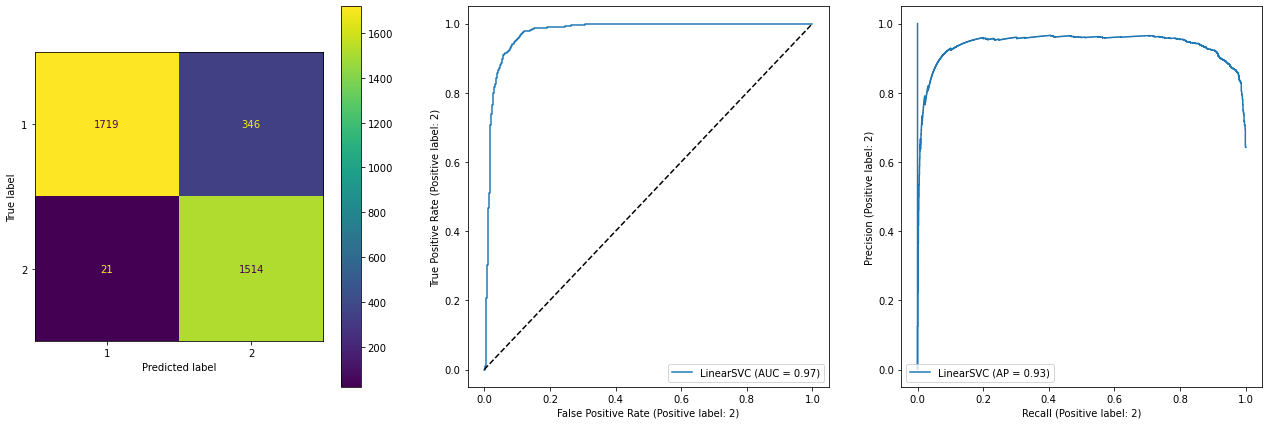

-------------------------------------------
Gaussian NaiveBayes Classifier

              precision    recall  f1-score   support

           1       0.95      0.91      0.93      2065
           2       0.89      0.93      0.91      1535

    accuracy                           0.92      3600
   macro avg       0.92      0.92      0.92      3600
weighted avg       0.92      0.92      0.92      3600

F1 score of minority class: 0.9088591459528362


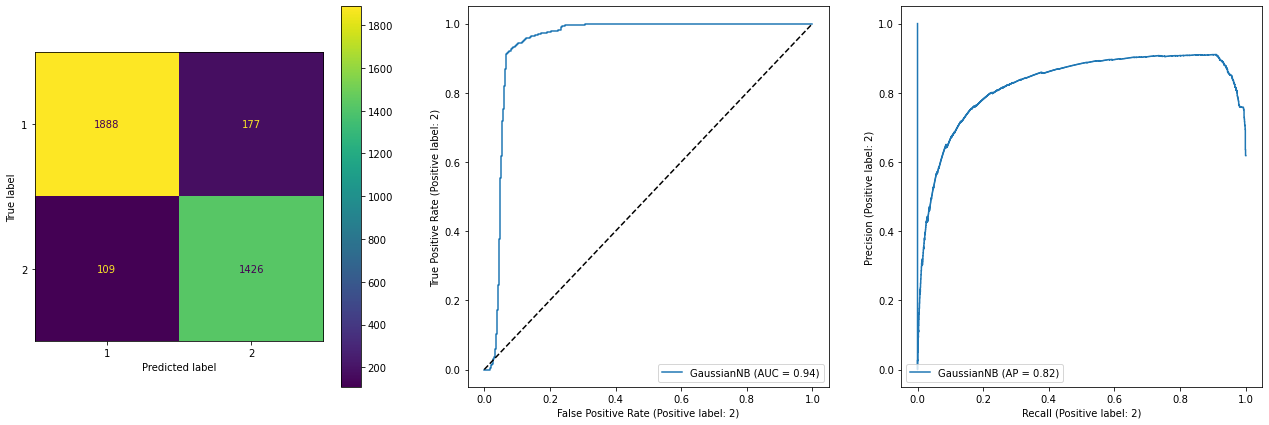

-------------------------------------------
k-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           1       0.94      0.98      0.96      2065
           2       0.97      0.91      0.94      1535

    accuracy                           0.95      3600
   macro avg       0.96      0.95      0.95      3600
weighted avg       0.95      0.95      0.95      3600



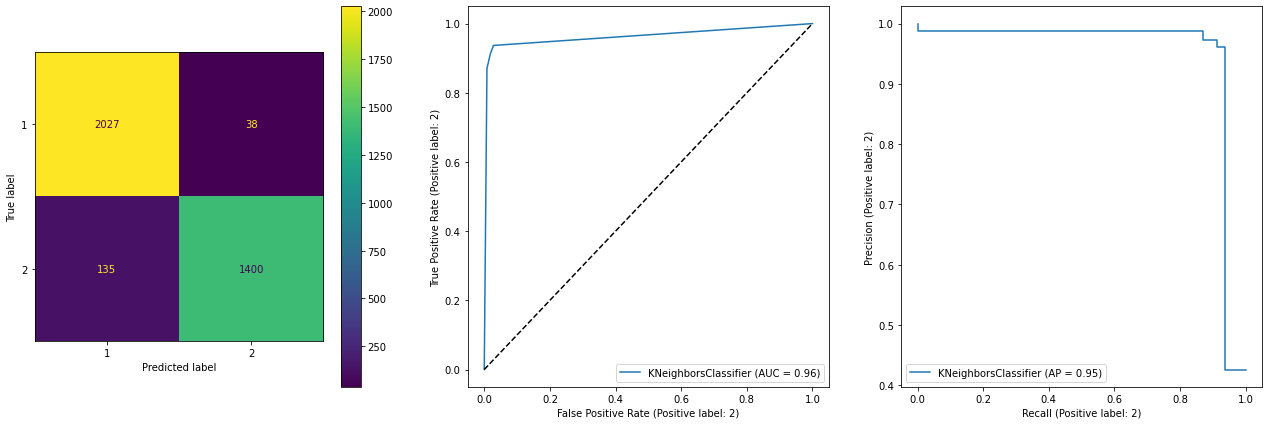

F1 score of minority class: 0.9418096199125462
-------------------------------------------
Random Forest Classifier

              precision    recall  f1-score   support

           1       0.95      0.99      0.97      2065
           2       0.99      0.92      0.96      1535

    accuracy                           0.96      3600
   macro avg       0.97      0.96      0.96      3600
weighted avg       0.96      0.96      0.96      3600



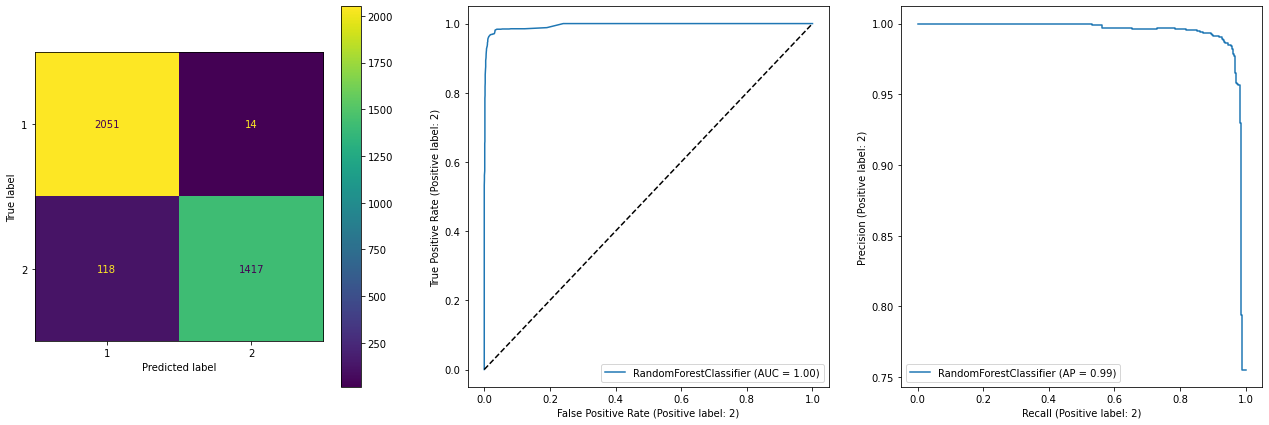

F1 score of minority class: 0.9554956169925827
[02:27:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Admin\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-------------------------------------------
XGBClassifier

              precision    recall  f1-score   support

           1       0.96      0.99      0.97      2065
           2       0.98      0.94      0.96      1535

    accuracy                           0.97      3600
   macro avg       0.97      0.97      0.97      3600
weighted avg       0.97      0.97      0.97      3600



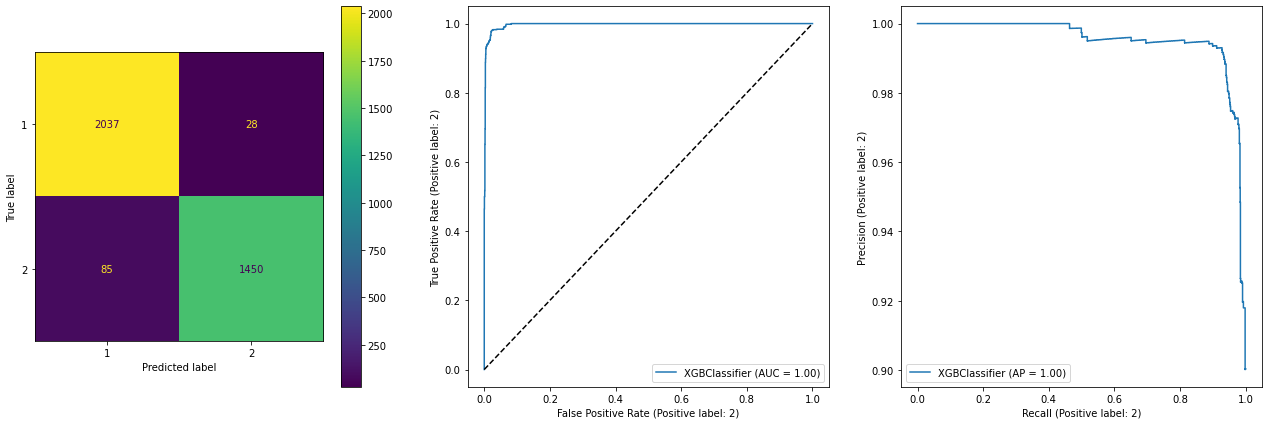

F1 score of minority class: 0.9624958513109857


[0.9146121467227901,
 0.9338731443994601,
 0.891899852724595,
 0.9088591459528362,
 0.9418096199125462,
 0.9554956169925827,
 0.9624958513109857]

In [44]:
f1_pca =  []
f1_pca.append(logistic(train_X,train_y,test_X,test_y))
f1_pca.append(decisionTree(train_X,train_y,test_X,test_y))
f1_pca.append(linearSVC(train_X,train_y,test_X,test_y))
f1_pca.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_pca.append(knn(train_X,train_y,test_X,test_y))
f1_pca.append(randomForest(train_X,train_y,test_X,test_y))
f1_pca.append(XGB(train_X,train_y,test_X,test_y))
f1_pca

# Comparison of Machine Learning Models

In [48]:
cols = ['Logistic','DecisionTree','LinearSVC','NaiveBayes','kNN','RandomForest', 'XGBClassifier']
import pandas as pd
df = pd.DataFrame(list(zip(f1_original,f1_processed,f1_smote,f1_pca)),columns = 
                  ['Original Data','Processed','Processed with SMOTE','Processed-SMOTE and PCA'],index=cols) 
df

,Original Data,Processed,Processed with SMOTE,Processed-SMOTE and PCA
Logistic,0.038095,0.600000,0.995349,0.914612
DecisionTree,0.181818,0.909091,0.991697,0.933873
LinearSVC,0.027907,0.615385,0.982951,0.891900
NaiveBayes,0.017668,0.070423,0.753376,0.908859
kNN,0.000000,0.571429,0.920528,0.941810
RandomForest,0.000000,0.571429,0.998667,0.955496
XGBClassifier,0.000000,0.750000,0.999000,0.962496


<AxesSubplot:>

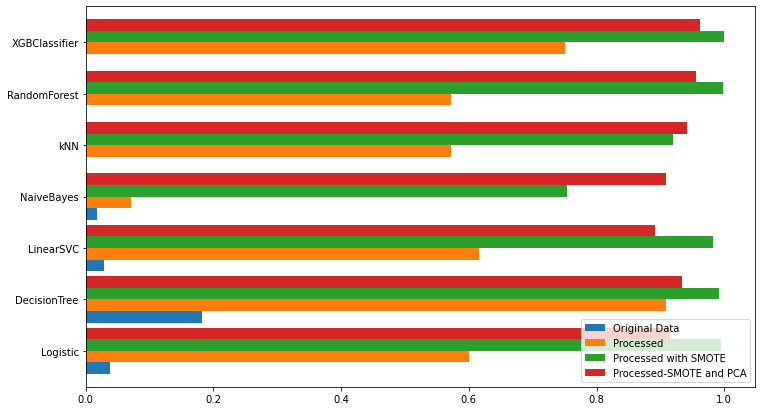

In [49]:
f,ax = plt.subplots(figsize=(12,7))
df.plot.barh(ax=ax,width=0.9,linewidth=1)

# From the above results, we can conclude that XGB Classifier with SMOTE is the best algorithm for detection of the stars with Exoplanets.